## Show posts creation trends

This notebook provides capabilities to select and show post creating trends per tag, calculated in the previous notebook.

In [2]:
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'iframe' # To make possible 

In [3]:
# Utility function for working with year-month operations
def substract_months(year_month: str, month_count: int) -> str:
    date = datetime.strptime(year_month, "%Y-%m")
    new_date = date - relativedelta(months=month_count)
    return new_date.strftime("%Y-%m")

def past_years_dates(year_month: str, years: int) -> list[str]:
    months = range(0, years * 12 + 1)
    return list([substract_months(year_month, month) for month in months])

In [4]:
tags_trends_df = pd.read_csv("tags_trends_df.csv")
tags_trends_df

,Tag,CreationYearMonth,Count_Tag,TotalCount_Tag,Count_All,TotalCount_All,CountPercantage,Rank
0,.a,2010-01,4,4.0,145866,1560787.0,0.000256,9138.0
1,.a,2010-03,2,6.0,160711,1862493.0,0.000322,9492.0
2,.a,2010-04,5,11.0,150604,2013097.0,0.000546,8539.0
3,.a,2011-02,1,12.0,236699,3929356.0,0.000305,11605.0
4,.a,2011-05,4,16.0,281657,4772127.0,0.000335,12028.0
...,...,...,...,...,...,...,...,...
3650769,zyte,2023-06,2,28.0,161929,55801992.0,0.000050,20477.0
3650770,zyte,2023-09,1,29.0,135820,56252733.0,0.000052,19279.0
3650771,zyte,2023-12,3,32.0,110803,56630812.0,0.000057,18069.0
3650772,zyte,2024-01,1,33.0,125348,56756160.0,0.000058,18929.0


### Calulate tredns for -3Y

In [5]:
# Function to extract first and last CountPercentage values from each group
def delta_by(df, source_column: str):
    start_column = f'Start{source_column}'
    end_column = f'End{source_column}'
    
    def extract_first_last(x):
        return pd.Series([x.iloc[0], x.iloc[-1]], index=[start_column, end_column])

    delta_df = df.\
        groupby('Tag')[source_column].\
        apply(extract_first_last).\
        unstack()
    
    delta_df[f'{source_column}Delta'] = delta_df[end_column] - delta_df[start_column]
    return delta_df

dates = past_years_dates("2024-02", 3)
latest_tags_trends_df = tags_trends_df[tags_trends_df["CreationYearMonth"].isin(dates)]

count_percantage_delta_df = delta_by(latest_tags_trends_df, 'CountPercantage')
rank_delta_df = delta_by(latest_tags_trends_df, 'Rank')
count_delta_df = delta_by(latest_tags_trends_df, 'TotalCount_Tag')

latest_tags_trends_delta_df =  count_percantage_delta_df.\
    merge(rank_delta_df, on='Tag', how='inner').\
    merge(count_delta_df, on='Tag', how='inner').\
    reset_index()

top_tags_trends_delta_df = latest_tags_trends_delta_df.sort_values(by='CountPercantageDelta', ascending=False)[0:20]

In [6]:
top_tags_trends_delta_df

,Tag,StartCountPercantage,EndCountPercantage,CountPercantageDelta,StartRank,EndRank,RankDelta,StartTotalCount_Tag,EndTotalCount_Tag,TotalCount_TagDelta
37769,python,7.667474,8.791050,1.123576,3.0,2.0,-1.0,3752424.0,5000679.0,1248255.0
39770,reactjs,1.233529,1.837574,0.604045,26.0,16.0,-10.0,603683.0,1045281.0,441598.0
16794,flutter,0.322545,0.696584,0.374039,106.0,48.0,-58.0,157852.0,396243.0,238391.0
34478,pandas,0.874296,1.156130,0.281834,39.0,30.0,-9.0,427876.0,657650.0,229774.0
49570,typescript,0.628813,0.886403,0.257590,54.0,39.0,-15.0,307738.0,504219.0,196481.0
38746,r,1.684369,1.915218,0.230849,17.0,15.0,-2.0,824322.0,1089448.0,265126.0
31789,node.js,1.602846,1.798679,0.195833,20.0,18.0,-2.0,784425.0,1023156.0,238731.0
10880,dart,0.204015,0.384349,0.180334,168.0,85.0,-83.0,99844.0,218632.0,118788.0
11197,dataframe,0.420681,0.600340,0.179660,76.0,57.0,-19.0,205879.0,341496.0,135617.0
37789,python-3.x,1.155841,1.309676,0.153835,30.0,26.0,-4.0,565663.0,744993.0,179330.0


## Show charts

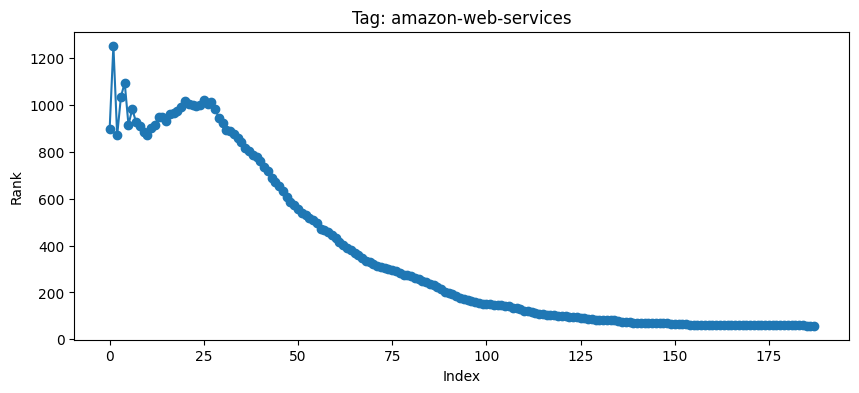

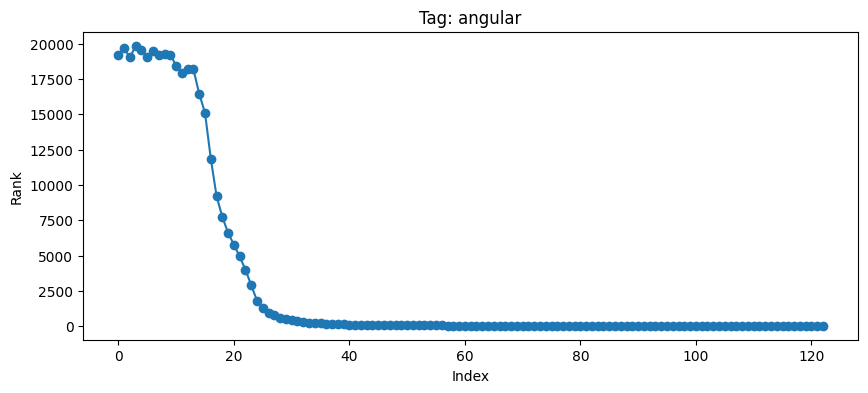

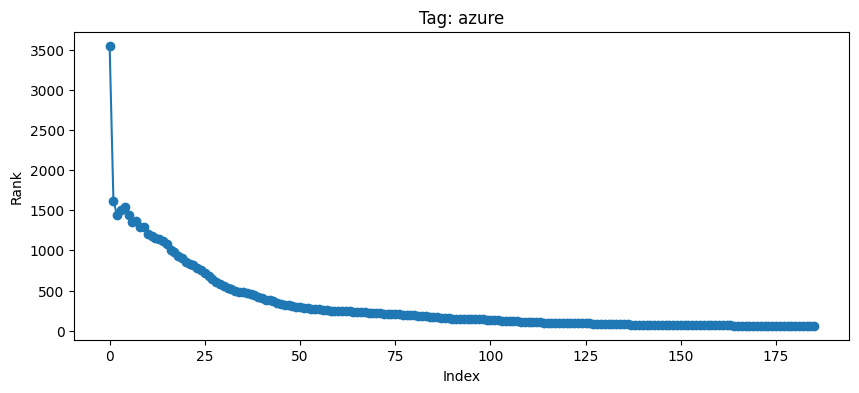

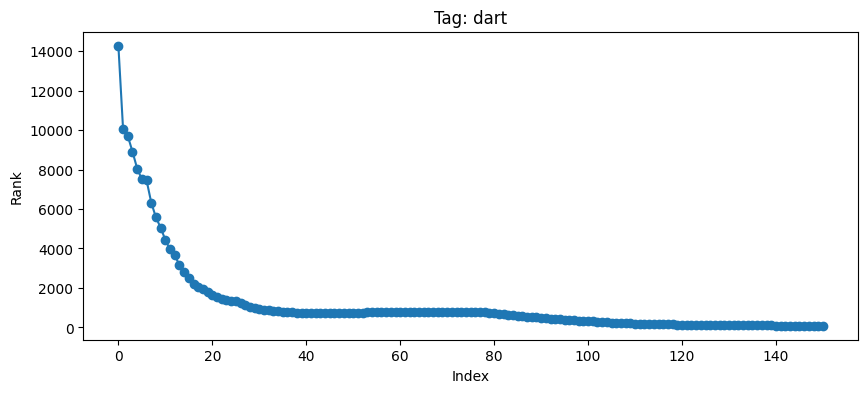

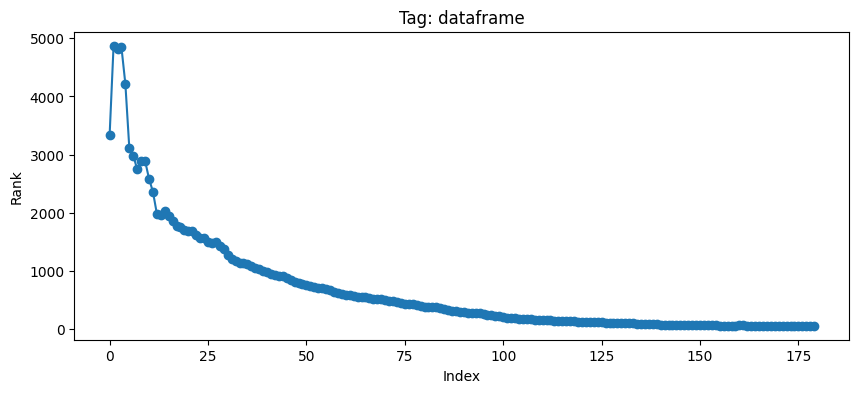

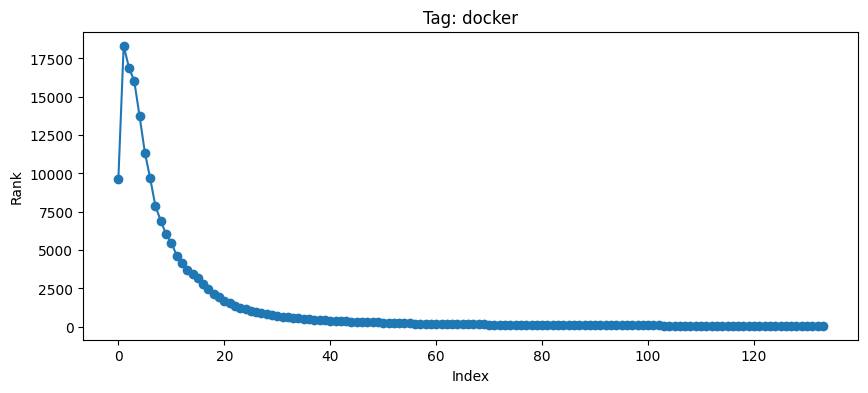

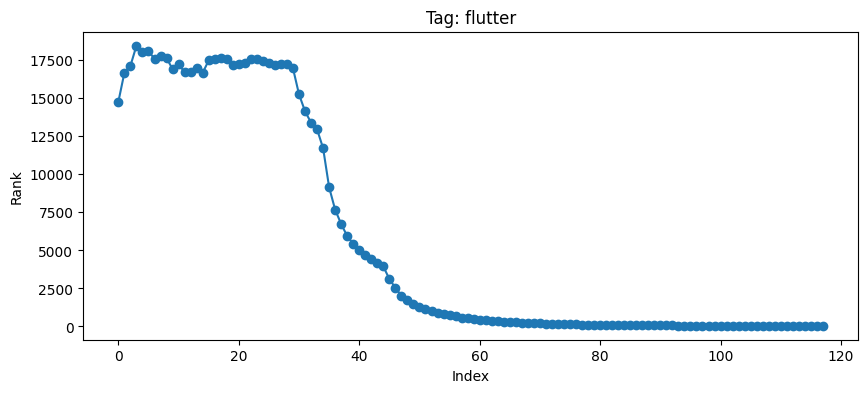

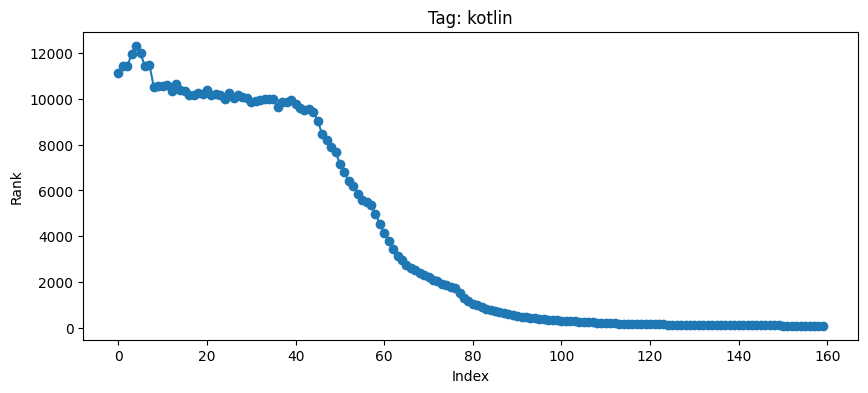

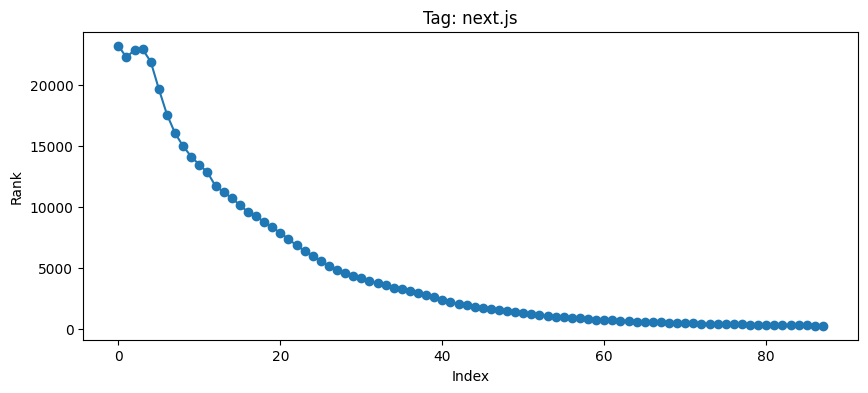

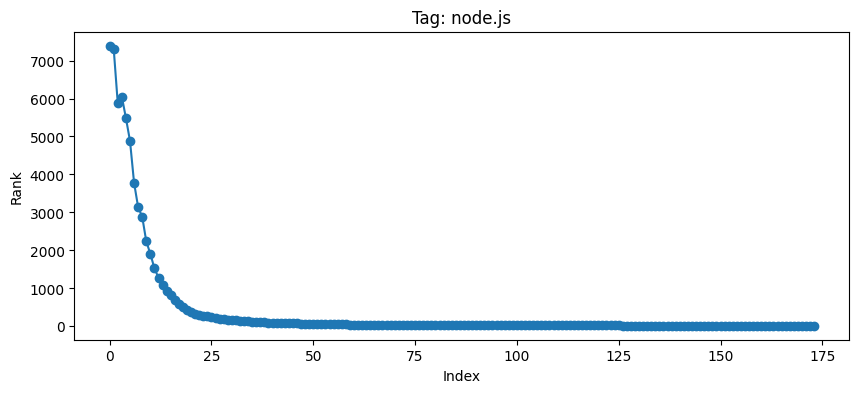

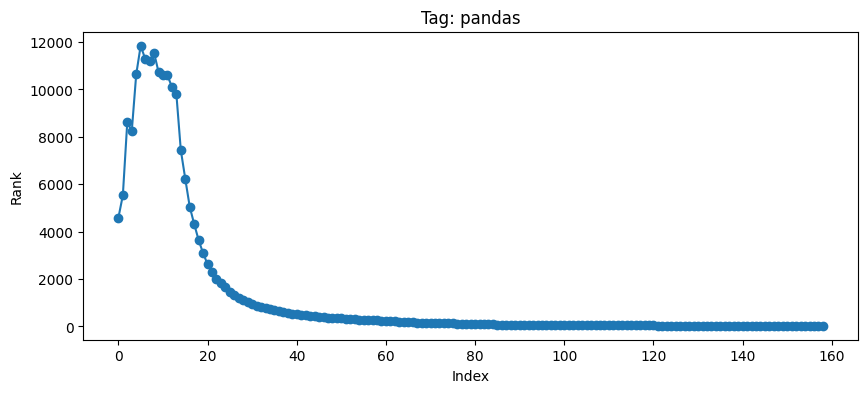

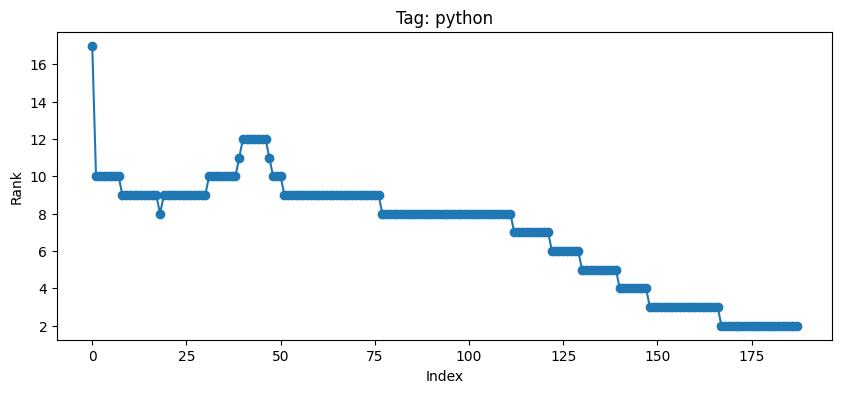

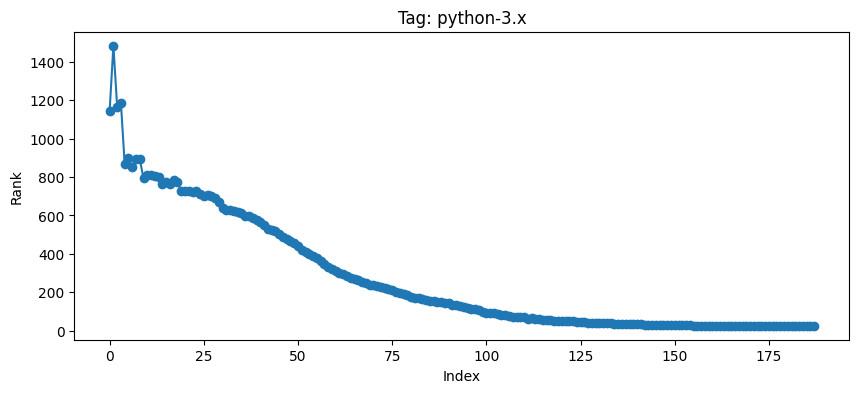

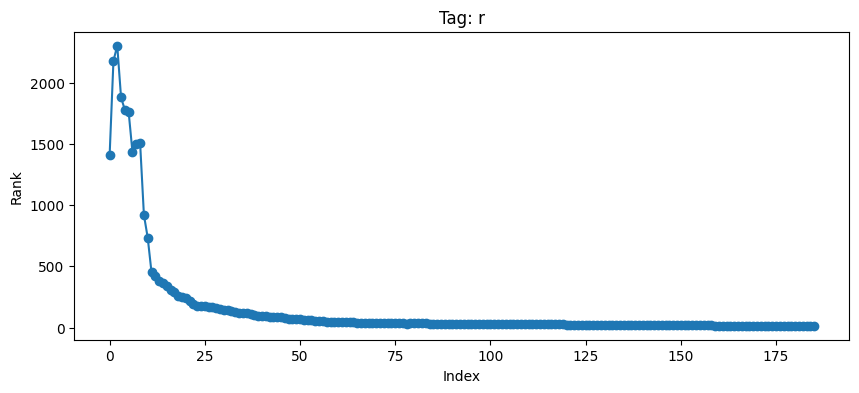

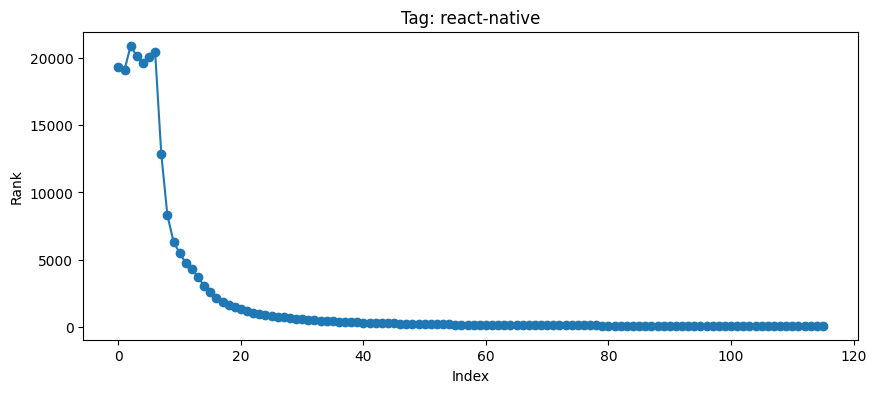

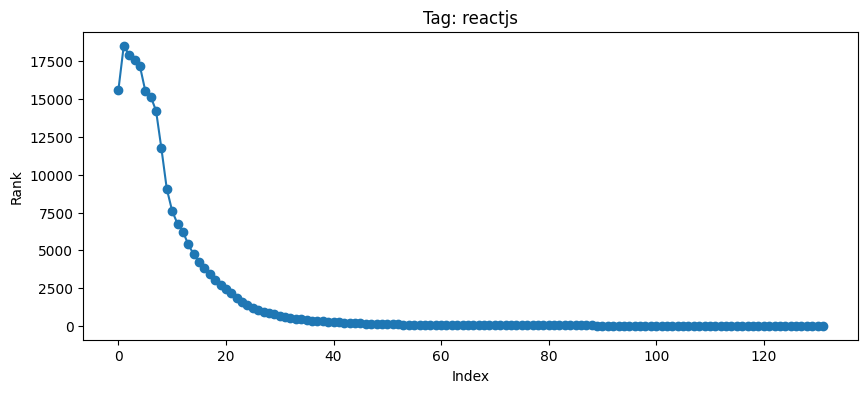

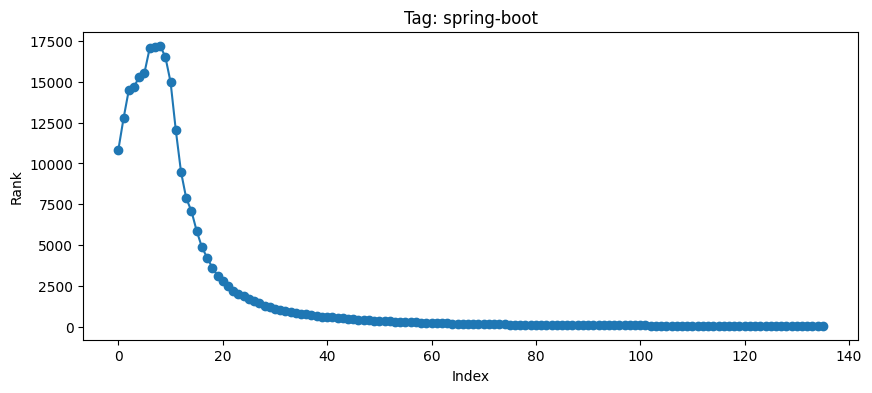

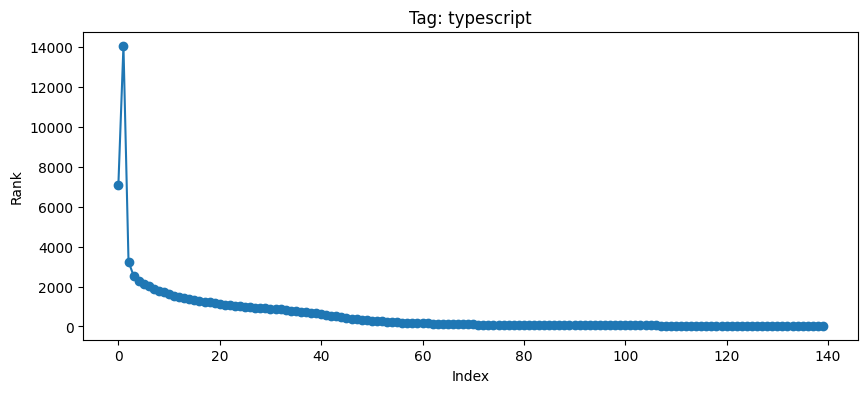

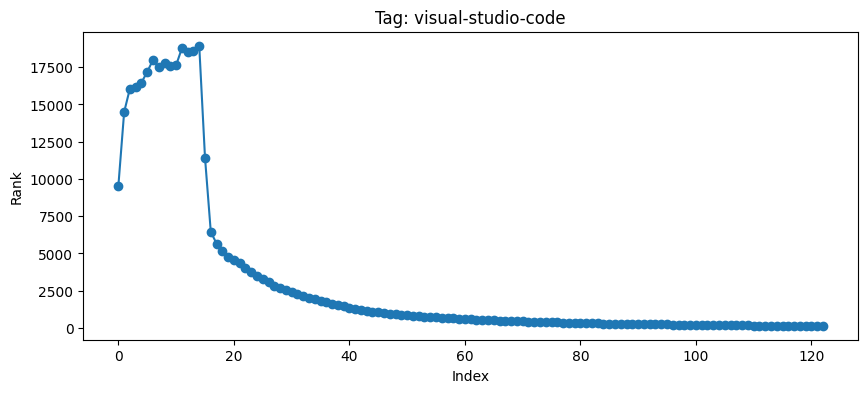

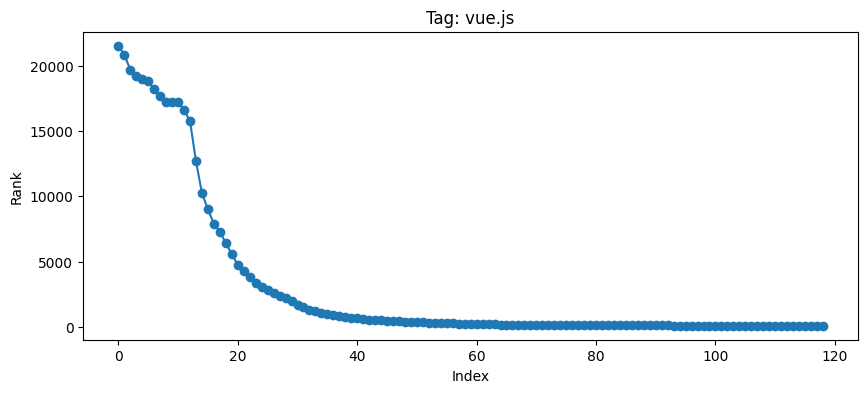

In [7]:
# TODO COLLECT CountPercantage, Rank, TotalCount_Tag into list and show 
# as a time series in matplotlib
import matplotlib.pyplot as plt

top_trending_tags = list(top_tags_trends_delta_df['Tag'])
selected_data = tags_trends_df[tags_trends_df['Tag'].isin(top_trending_tags)].\
    groupby('Tag').\
    agg({'Rank': lambda x: list(x)}).\
    reset_index()

# Visualize the 'Rank' values for the selected tags
for index, row in selected_data.iterrows():
    plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
    plt.plot(row['Rank'], marker='o', linestyle='-', label=f"Tag: {row['Tag']}")
    plt.title(f"Tag: {row['Tag']}")
    plt.xlabel('Index')
    plt.ylabel('Rank')
    plt.show()

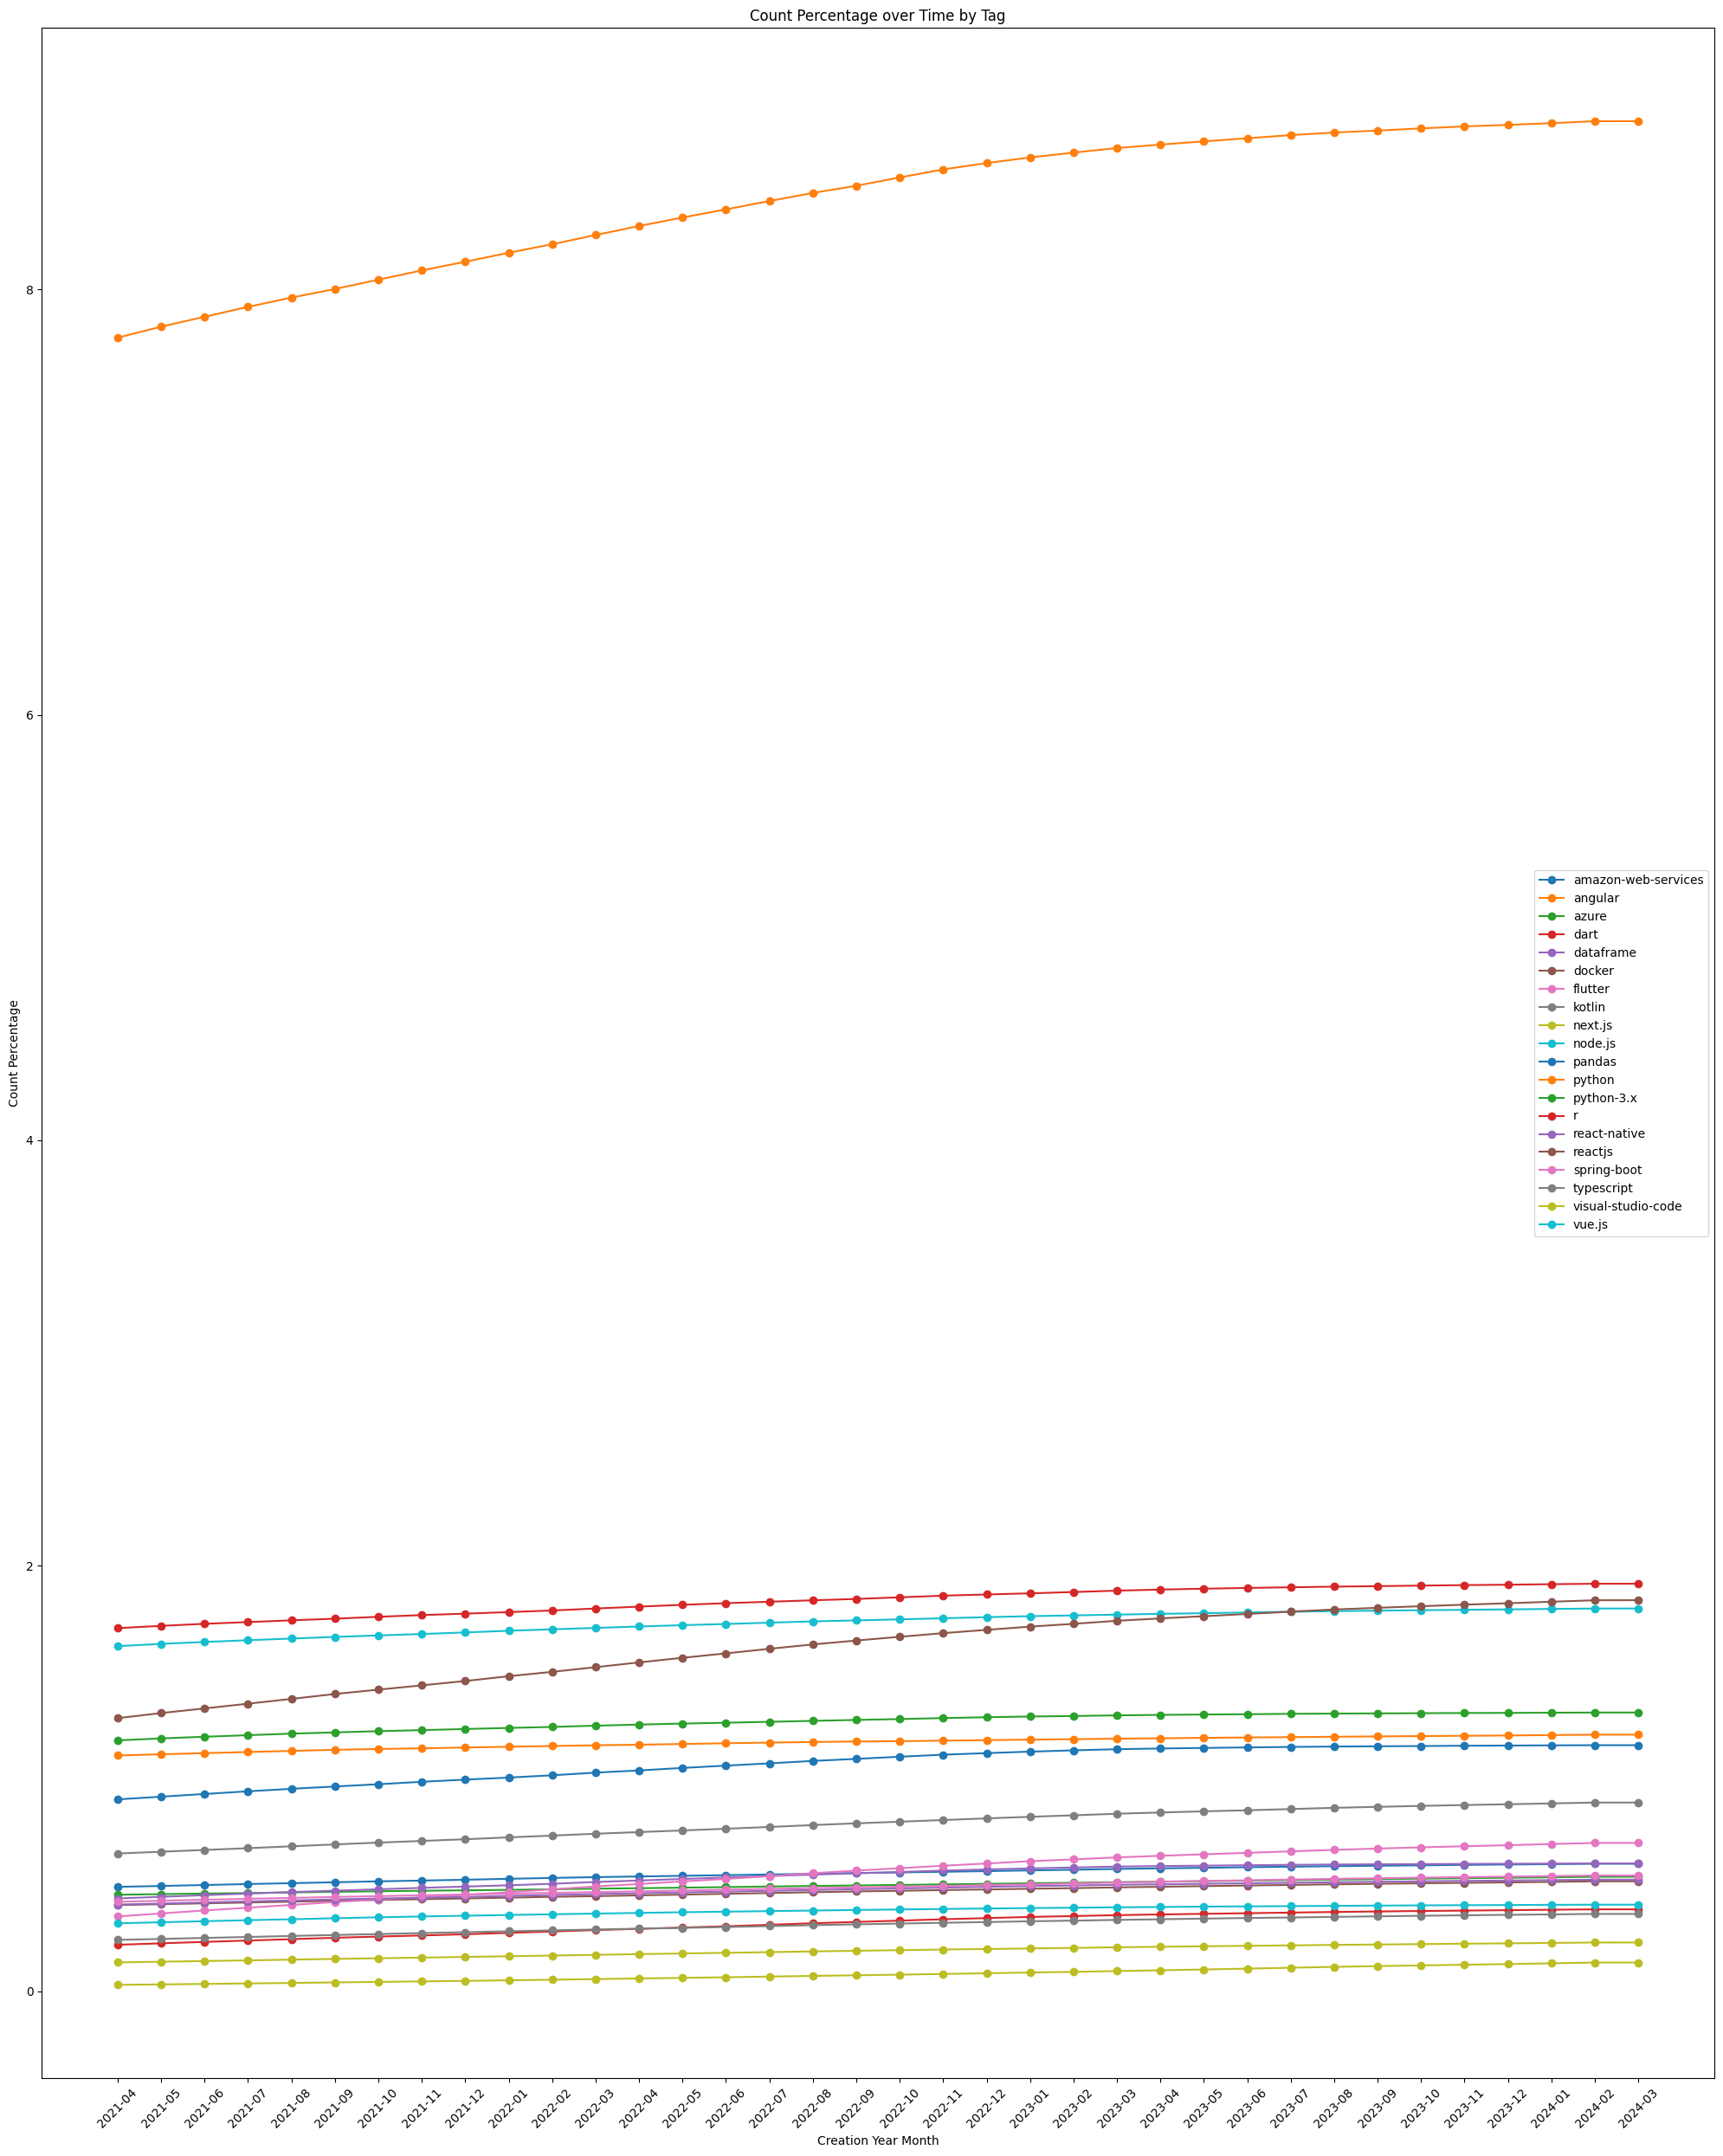

In [35]:
import matplotlib.pyplot as plt

top_trending_tags = list(top_tags_trends_delta_df['Tag'])

# [-36:] - take data fro last 3 years to be aligned
df = tags_trends_df[tags_trends_df['Tag'].isin(top_trending_tags)].\
    groupby('Tag').\
    agg({'CountPercantage': lambda x: list(x)[-36:], 'CreationYearMonth': lambda x: list(x)[-36:]}).\
    reset_index()

fig, ax = plt.subplots(figsize=(20, 25))

for index, row in df.iterrows():
    ax.plot(row['CreationYearMonth'], row['CountPercantage'], label=row['Tag'], marker='o')

ax.set_xlabel('Creation Year Month')
ax.set_ylabel('Count Percentage')
ax.set_title('Count Percentage over Time by Tag')
ax.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [42]:
top_trending_tags = list(top_tags_trends_delta_df['Tag'])

# [-36:] - take data fro last 3 years to be aligned
df = tags_trends_df[tags_trends_df['Tag'].isin(top_trending_tags)].\
    groupby('Tag').\
    agg({'CountPercantage': lambda x: list(x)[-36:], 'CreationYearMonth': lambda x: list(x)[-36:]}).\
    reset_index()
df

,Tag,CountPercantage,CreationYearMonth
0,amazon-web-services,"[0.4902119827093817, 0.4943245951513518, 0.498...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
1,angular,"[1.1078300506452503, 1.11340624220118, 1.11877...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
2,azure,"[0.4529509891727425, 0.4558191588785609, 0.458...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
3,dart,"[0.2178376912977834, 0.2246621813392831, 0.231...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
4,dataframe,"[0.4358146043724676, 0.4433270060887009, 0.451...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
5,docker,"[0.4045240055872726, 0.408766988013992, 0.4126...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
6,flutter,"[0.3510890734471949, 0.3652209640788829, 0.379...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
7,kotlin,"[0.2408294615555406, 0.2453099367694081, 0.250...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
8,next.js,"[0.0292971043565278, 0.0315493049504989, 0.033...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
9,node.js,"[1.6218469394977668, 1.6325687191760443, 1.641...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."


In [48]:
# Initialize a plotly figure
fig = go.Figure()

# Loop through each row in the DataFrame and add a line to the figure for each
for index, row in df.iterrows():
    fig.add_trace(go.Scatter(x=row['CreationYearMonth'], 
                             y=row['CountPercantage'], 
                             mode='lines+markers', # This will create both lines and markers on each point
                             name=row['Tag'])) # Use the Tag column for the legend

# Update layout options as needed
fig.update_layout(title='Count Percentage over Time by Tag',
                  xaxis_title='Creation Year Month',
                  yaxis_title='Count Percentage',
                  legend_title='Tag',
                  width=1200,
                  height=600
                 )

# Show the figure
fig.show()

In [50]:
# [-36:] - take data fro last 3 years to be aligned
rank_df = tags_trends_df[tags_trends_df['Tag'].isin(top_trending_tags)].\
    groupby('Tag').\
    agg({'Rank': lambda x: list(x)[-36:], 'CreationYearMonth': lambda x: list(x)[-36:]}).\
    reset_index()
rank_df

,Tag,Rank,CreationYearMonth
0,amazon-web-services,"[66.0, 64.0, 62.0, 60.0, 60.0, 60.0, 60.0, 59....","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
1,angular,"[32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31....","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
2,azure,"[69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69....","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
3,dart,"[158.0, 157.0, 156.0, 151.0, 143.0, 139.0, 136...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
4,dataframe,"[72.0, 72.0, 70.0, 70.0, 68.0, 68.0, 68.0, 67....","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
5,docker,"[80.0, 80.0, 80.0, 80.0, 80.0, 79.0, 79.0, 79....","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
6,flutter,"[100.0, 95.0, 89.0, 86.0, 81.0, 81.0, 78.0, 74...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
7,kotlin,"[147.0, 143.0, 138.0, 137.0, 135.0, 134.0, 127...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
8,next.js,"[1143.0, 1063.0, 996.0, 944.0, 898.0, 856.0, 8...","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."
9,node.js,"[19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18....","[2021-04, 2021-05, 2021-06, 2021-07, 2021-08, ..."


In [51]:
# Initialize a plotly figure
rank_fig = go.Figure()

# Loop through each row in the DataFrame and add a line to the figure for each
for index, row in rank_df.iterrows():
    rank_fig.add_trace(go.Scatter(x=row['CreationYearMonth'], 
                             y=row['Rank'], 
                             mode='lines+markers', # This will create both lines and markers on each point
                             name=row['Tag'])) # Use the Tag column for the legend

# Update layout options as needed
rank_fig.update_layout(title='Rank over Time by Tag',
                  xaxis_title='Creation Year Month',
                  yaxis_title='Rank',
                  legend_title='Tag',
                  width=1200,
                  height=600)

# Show the figure
rank_fig.show()